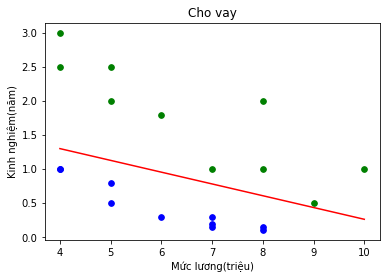

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# read data
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv').values
#data
N, d = data.shape
x = data[:,0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
# scatter plot
x_cho_vay = x[y[:, 0] == 1]
x_khong_cho_vay = x[y[:,0] == 0]
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1] , c ='green', s =32, label = 'Cho vay')
plt.scatter(x_khong_cho_vay[:, 0], x_khong_cho_vay[:, 1] , c ='blue', s =32, label = 'Khong Cho vay')
plt.xlabel("Mức lương(triệu)")
plt.ylabel("Kinh nghiệm(năm)")
plt.title('Cho vay')

#add a column 1 into x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)
# number of iteration
numIteration = 1000
cost = np.zeros((numIteration, 1))
learning_rate = 0.01
for i in range(1, numIteration):
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate*np.dot(x.T, y_predict-y)
    #print(cost[i])
    
# boundary
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'red')
plt.show()